In [2]:
from qiskit import QuantumCircuit, BasicAer, execute, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
import numpy as np
from PIL import Image

# Lista 9 (8 pkt. + 3 pkt.) Termin: 28.01.2021r.

## Zadanie 1 (2 pkt.)

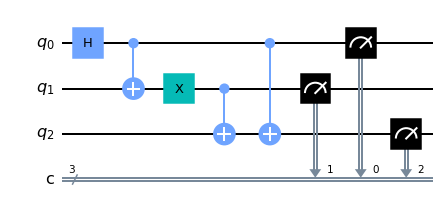

In [4]:
qc = QuantumCircuit(3,3)

qc.h(0)
qc.cx(0,1)
qc.x(1)
qc.cx(1,2)
qc.cx(0,2)

qc.measure([0,1,2],[0,1,2])

qc.draw(output='mpl')

Policz ręcznie (można w notebooku w Latex-u wpisywać wzory, zmieniając typ komórki na 'Markdown' i wstawiając kod Latex-a pomiędzy znakami '\\$',\\$', albo dołącz zdjęcie kartki) jak będzie wyglądał stan kwantowy po wykonaniu powyższego obwodu (przed pomiarem), wyznacz jakie są prawdopodobieństwa otrzymania poszczególnych wyników, tj. '000','001','010',itd., wykonaj symulację tego obwodu, narysuj histogram i sprawdź czy otrzymane prawdopodobieństwa zgadzają się z wyliczonymi.

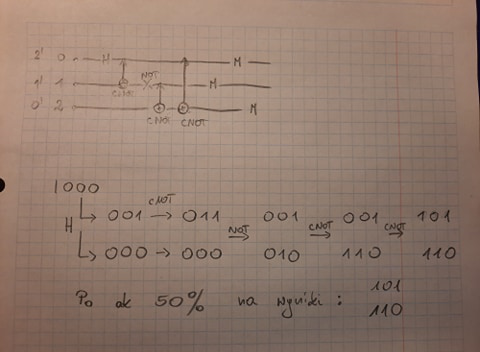

In [14]:
Obwod1

{'101': 527, '110': 497}


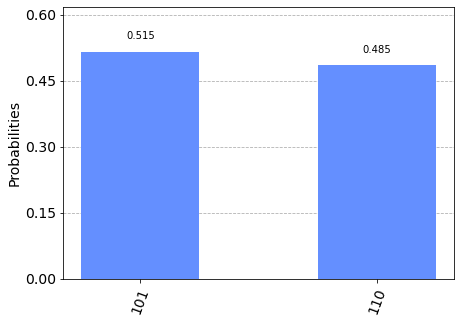

In [5]:
backend = BasicAer.get_backend('qasm_simulator')
counts = execute(qc, backend, shots=1024).result().get_counts()
print(counts)
plot_histogram(counts)

## Zadanie 2 (2 pkt.)

To samo co poprzednio. Bramka $U$ jest zdefiniowana następująco:

$$U\left(\theta,\phi,\lambda\right)=\left(\begin{array}{cc}
\cos\frac{\theta}{2}&-e^{i\lambda}\sin\frac{\theta}{2}\\
e^{i\phi}\sin\frac{\theta}{2}&e^{i(\phi+\lambda)}\cos\frac{\theta}{2}\\
\end{array}\right)$$

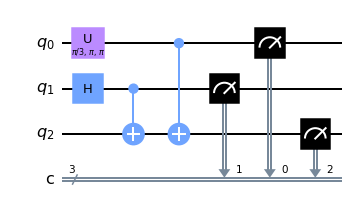

In [15]:
qc = QuantumCircuit(3,3)

qc.u(np.pi/3,np.pi,np.pi,0)#theta=pi/3,phi=pi,lambda=pi
qc.h(1)
qc.cx(1,2)
qc.cx(0,2)

qc.measure([0,1,2],[0,1,2])

qc.draw(output='mpl')

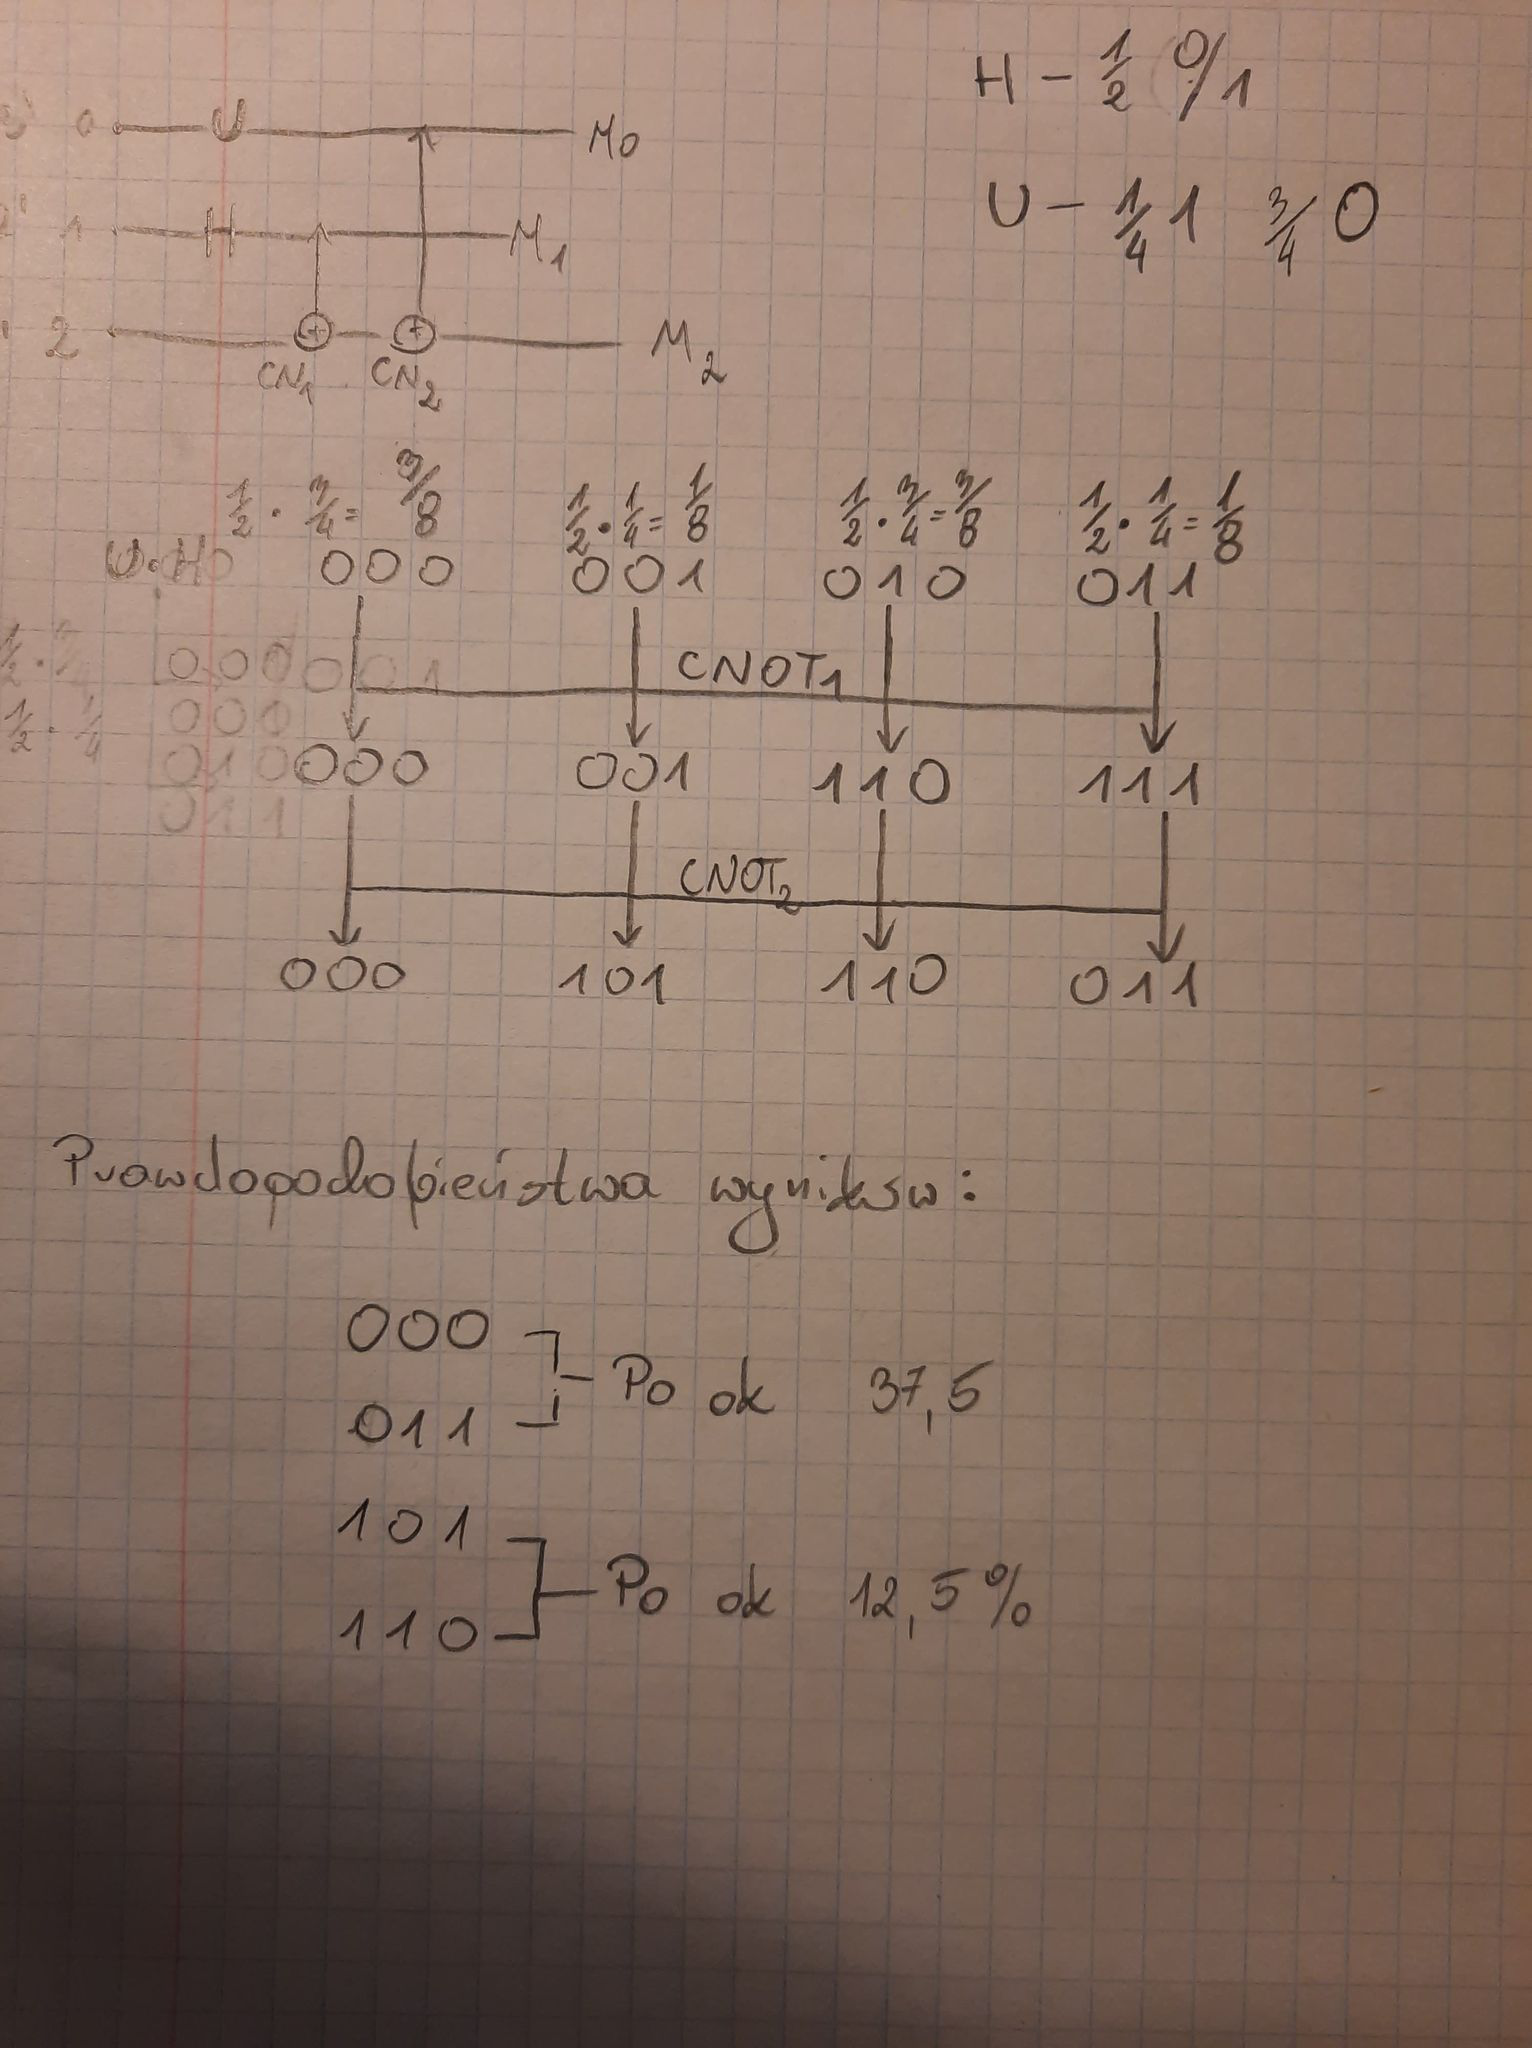

In [20]:
Obwod2

{'000': 398, '011': 129, '110': 367, '101': 130}


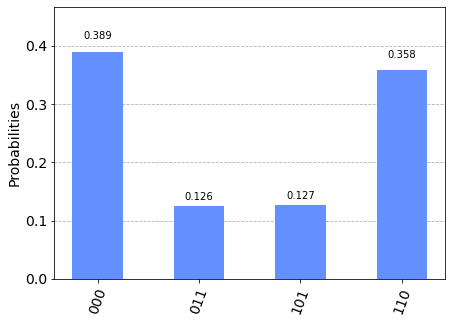

In [17]:
backend = BasicAer.get_backend('qasm_simulator')
counts = execute(qc, backend, shots=1024).result().get_counts()
print(counts)
plot_histogram(counts)

## Zadanie 3 (2 pkt.)

W tym zadaniu dokonamy teleportacji stanu kwantowego. Najpierw zdefiniujmy sobie jakiś stan kwantowy, np. generowany przez następującą bramkę:

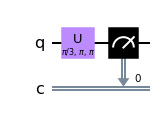

In [3]:
qc = QuantumCircuit(1,1)
qc.u(np.pi/3,np.pi,np.pi,0)
qc.measure([0],[0])
qc.draw(output='mpl')

Jest to następujący stan:

$$\frac{\sqrt{3}}{2}|0\rangle-\frac{1}{2}|1\rangle$$

możemy sprawdzić, że robiąc symulację dostajemy rzeczywiście prawdopodobieństwa $|\frac{\sqrt{3}}{2}|^2=\frac{3}{4}$ oraz $|-\frac{1}{2}|^2=\frac{1}{4}$

{'0': 6135, '1': 2061}


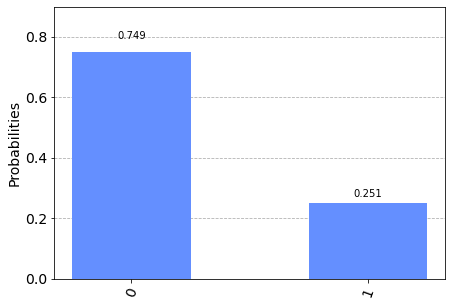

In [4]:
backend = BasicAer.get_backend('qasm_simulator')
counts = execute(qc, backend, shots=8196).result().get_counts()
print(counts)
plot_histogram(counts)

powyższy stan będziemy chcieli przeteleportować, powiedzmy między Alicją i Bobem, zdefiniujmy obwód z 3 kubitami i 3 klasycznymi bitami, tym razem wprowadzimy je za pomocą ClassicalRegister i QuantumRegister, kubit numer 0 będzie tym na którym będzie stan, który chcemy przeteleportować, będzie on w posiadaniu Alicji, kubity nr 1 i nr 2 są kubitami, która wprowadzimy w stan splątany i posłużą nam za pośrednika w teleportacji, kubit nr 1 bedzia miała Alicja a kubit nr 2 Bob.

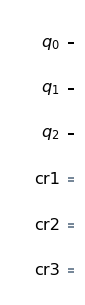

In [5]:
cr1=ClassicalRegister(1,name='cr1')
cr2=ClassicalRegister(1,name='cr2')
cr3=ClassicalRegister(1,name='cr3')

qr=QuantumRegister(3,name='q')

qc = QuantumCircuit(qr,cr1,cr2,cr3)

qc.draw(output='mpl')

następnie dodajemy bramkę generującą stan,który chcemy przeteleportować, na koniec każdego etapu będziemy wstawiać barierę (linia przerywana obrazku) za pomocą metody .barrier(), powinnniśmy otrzymać:

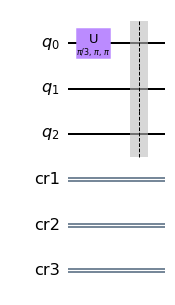

In [6]:
qc.u(np.pi/3,np.pi,np.pi,0)
qc.barrier()
qc.draw(output='mpl')

teraz tworzymy parę splątaną między kubitem numer 1 należącym do Alicji i kubitem numer 2 należącym do Boba, chcemy uzyskać parę splątaną w postaci $\frac{1}{\sqrt{2}}\left(|00\rangle+|10\rangle\right)$, wygenerujemy ją za pomocą bramki Haadamarda i CNOT-a:

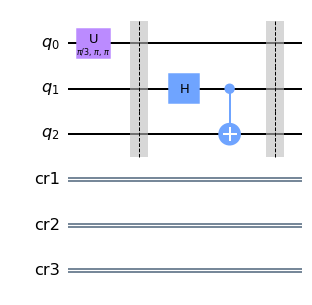

In [7]:
qc.h(1)
qc.cx(1,2)
qc.barrier()
qc.draw(output='mpl')

następnie musimy wykonać pomiar na dwóch kubitach Alicji (nr 0 i nr 1) ale w tzw. bazie Bela, jest to baza w przestrzeni dwóch kubitów skaładająca sie z stanów: $\frac{1}{\sqrt{2}}\left(|00\rangle+|11\rangle\right)$, $\frac{1}{\sqrt{2}}\left(|00\rangle-|11\rangle\right)$, $\frac{1}{\sqrt{2}}\left(|01\rangle+|10\rangle\right)$, $\frac{1}{\sqrt{2}}\left(|01\rangle-|10\rangle\right)$, aby obrócić do bazy Bella należy użyć CNOT-a i Hadamarda.

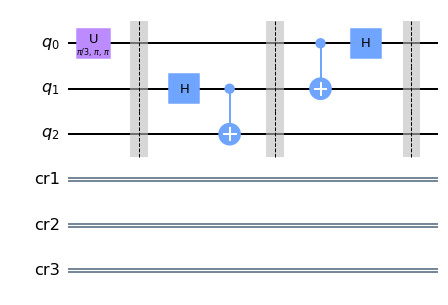

In [8]:
qc.cx(0,1)
qc.h(0)
qc.barrier()
qc.draw(output='mpl')

potem Alicja dokonuje pomiaru na swoich kubitach (nr 0 i nr 1)

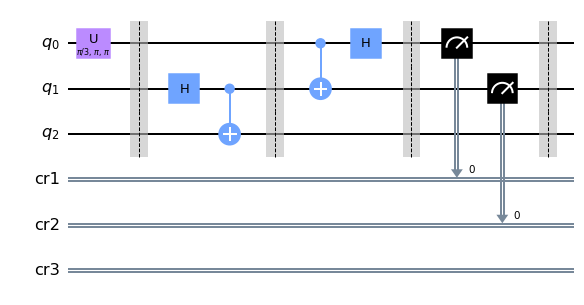

In [9]:
qc.measure([0],[0])
qc.measure([1],[1])
qc.barrier()

qc.draw(output='mpl')

następnie Alicja przesyła Bobowi otrzymany wynik, tj. albo '00' albo '01' albo '10' albo '11'. Bob stoswonie do wyniku aplikuje na swoim kubicie albo nic albo bramkę $Z=\left(\begin{array}{cc}
1&0\\
0&-1\\
\end{array}\right)$ albo bramkę $X$ albo bramkę $X$ i $Z$, w celu wykonania bramki pod warunkiem określonego wyniku wcześniejszego pomiaru stosujemy metodę .c_if(cr,1), która wykona daną operację pod warunkiem że rejestr klasyczny cr jest równy 1, dlatego właśnie musieliśmy zdefiniować rejestry klasyczne każdy osobno, tj. cr1, cr2, cr3.

Np.:

qc.x(2).c_if(cr2, 1)

oznacza, że do obowdu qc zostanie dodana bramka $X$ na kubicie nr 2, która będzie wykonywana pod warunkiem, że bit cr2 będzie równy 1.

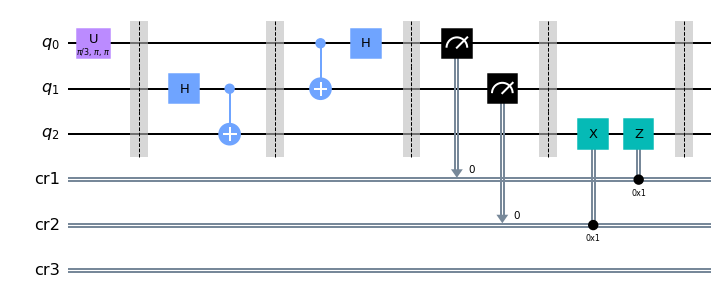

In [10]:
qc.x(2).c_if(cr2,1)
qc.z(2).c_if(cr1,1)
qc.barrier()
qc.draw(output='mpl')

po wykonaniu odpowiedniej operacji Bob na swoim kubicie nr 2 uzyska stan taki jaki Alicja miała na początku na swoim kubcie nr 0, warto tutaj zaznaczyć, że Alicja na swoim kubicie nr 0 już nie ma tego stanu, gdyby on tam pozostał łamałoby to zakaz klonowania.

Na końcu sprawdzimy czy rzeczywiście stan otrzymany na końcu jest poprawny, dokonujemy pomiaru na ostanim kubicie.

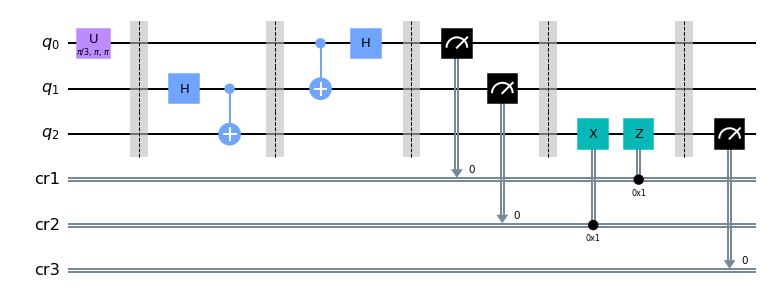

In [11]:
qc.measure([2],[2])
qc.draw(output='mpl')

robimy symulację:

{'1 0 0': 512, '0 1 0': 1507, '0 1 1': 1507, '1 1 0': 532, '0 0 1': 1573, '0 0 0': 1546, '1 1 1': 512, '1 0 1': 507}


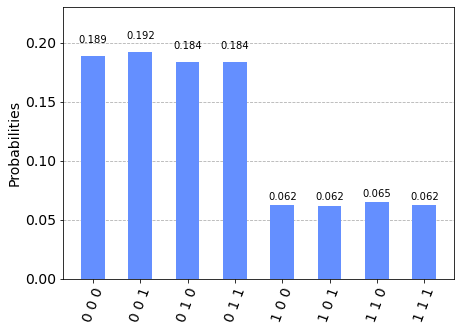

In [12]:
backend = BasicAer.get_backend('qasm_simulator')
counts = execute(qc, backend, shots=8196).result().get_counts()
print(counts)
plot_histogram(counts)

następnie musimy zliczyć ile razy otrzymaliśmy '0' na ostanim kubicie i ile razy '1', należy tu pamiętać o konwencji Qiskit-a, który zczytuje wyniki od ostaniego kubitu, potem rysujemy histogram, i porównujemy go z histogramem z poczatku zadania, który odpowiadał stanowi, który chcieliśmy przeteleportować.

In [13]:
results = {'0': 0, '1': 0}
for key in counts:
    x = results.get(key[0])
    results.update({key[0]: x+counts.get(key)})
print(results)

{'0': 6133, '1': 2063}


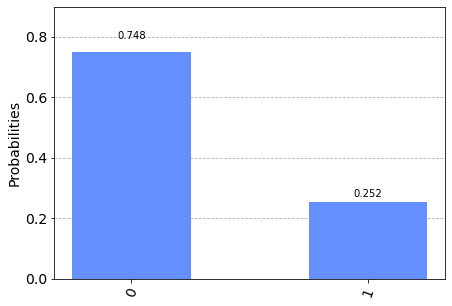

In [14]:
plot_histogram(results)

## Zadanie 4 (2 pkt.)

Załóżmy, że stan który chcemy teleportować ma ogólną postać:

$$\alpha|0\rangle+\beta|1\rangle$$

zatem początkowy stan całego kwantowego rejestru to:

$$\alpha|000\rangle+\beta|100\rangle$$

zapisz kolejne kroki wykonywane w teleportacji do momentu pomiarów wykonywanych przez Alicję, w wyniku pomiaru stan kolapsuje losowo na jeden ze stanów bazy w której dokonujemy pomiaru (tutaj baza Bella), rozważ wszystkie cztery przypadki, tj. pierwszy przypadek dostajemy w wyniku pomiaru '00' i stan na dwóch pierwszych kubitach (tych na których był pomiar) kolapsuje do $|00\rangle$, drugi przypadek dostajemy w wyniku pomiaru '01' i stan na dwóch pierwszych kubitach (tych na których był pomiar) kolapsuje do $|01\rangle$, itd. Następnie w każdym przypadku wykonaj na kubicie Boba odpowiednią operację i zobacz, że stan który uzyska Bob to ten, który chcieliśmy przeteleportować, czyli:

$$\alpha|0\rangle+\beta|1\rangle$$


## Zadanie 5* (3 pkt.)

Zaloguj się do IBM Q (szczegóły na stronie kursu), stwórz obwód jednokubitowy z bramką $X$ i pomiarem:

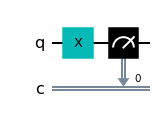

In [18]:
qc = QuantumCircuit(1,1)

qc.x(0)

qc.measure(0,0)

qc.draw(output='mpl')

uruchom go na, którymś z procesorów kwantowych, zobacz jakie prawdopodobieństwa stanów uzyskałeś. Teoretycznie powinniśmy otrzymać wyłącznie wyniki '1' ale ze względu na liczne szumy i niedoskonałości obecnych prcesorów, dostajemy również niewielką domieszkę stanów '0'. Policz fidelity pomiędzy otrzymanym stanem a stanem, który powinien wyjść. Fidelity jest zdefiniowane jako (wersja uproszczona):

$$F(p,q)=\sum_i\sqrt{p_iq_i}$$

gdzie $p_i$ to prawdopodobieństwo wyniku pomiaru równego $i$ na jednym ze stanów a $q_i$ to prawdopodobieństwo wyniku pomiaru równego $i$ na drugim ze stanów.

Czyli w naszym przypadku powinniśmy otrzymać stan $|1\rangle$, czyli $p_0=0$, $p_1=1$ ale w wyniku pomiaru na zaszumionym komputerze dostajemy jakieś prawdopodobieństwa $q_0$ i $q_1$, zatem fidelity będzie równe:

$$F(p,q)=\sqrt{p_0q_0}+\sqrt{p_1q_1}=\sqrt{q_1}$$

Następnie stwórz obwód jednokubitowy z trzema $X$ (wstaw pomiędzy nie bariery aby kompilator ich nie uprościł), teoretycznie jest on równoważny jednemu $X$, bo $X^2=\mathbb{1}$, zatem $X^3=X$ ale z racji, że na prawdziwym komputerze kwantowym każda operacja wprowadza pewne błędy wynik będzie jeszcze bardziej zaszumiony niż przy użyciu jednego $X$. Policz fidelity dla 3 $X$, zrób to samo dla 5, 7 i 9 $X$, narysuj wykres fidelity od liczby bramek.

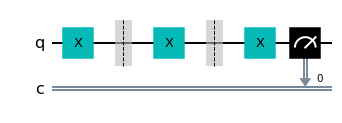

In [19]:
qc = QuantumCircuit(1,1)

qc.x(0)
qc.barrier()
qc.x(0)
qc.barrier()
qc.x(0)

qc.measure(0,0)

qc.draw(output='mpl')

In [19]:
def dec2bin(dec_str,pad):
    return format(int(dec_str),'0'+str(pad)+'b')

Obwod1=Image.open('Obwod1.jpg')
arr=np.array(img).ravel()
arr_bin=[dec2bin(d,pad='8') for d in arr]
bits=''.join(arr_bin)

Obwod2=Image.open('Obwod2.jpg')
arr=np.array(img).ravel()
arr_bin=[dec2bin(d,pad='8') for d in arr]
bits=''.join(arr_bin)